In [3]:
from numpy import load
import pickle
import scipy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Look into partial fitting. 
# Dataset is not evenly distributed with most being 1.
# Dummy Classifier has 50 % accuracy score... (Only give instances the most frequent label)



# steps_countvec = scipy.sparse.load_npz('recipe_text_features_countvec/train_steps_countvectorizer.pkl')

# Doc2Vect is a technique to transfer words into numerical representation. 
# https://www.shibumi-ai.com/post/a-gentle-introduction-to-doc2vec
d2v_ingr = pd.read_csv("recipe_text_features_doc2vec100/train_ingr_doc2vec100.csv", header=None)
d2v_name = pd.read_csv("recipe_text_features_doc2vec100/train_name_doc2vec100.csv", header=None)
d2v_steps = pd.read_csv("recipe_text_features_doc2vec100/train_steps_doc2vec100.csv", header=None)




# Extract class_labels from training set 
# quick = 1
# medium = 2
# slow = 3
data_train = pd.read_csv('recipe_train.csv')

# Obtain the labels
train_label = data_train.iloc[:,-1]




# Feature selection with f_classif (ANOVA F-value)
# ANOVA f-value shows how well a feature discriminate between classes
# The more discrimination, the better that feature is in predicting the class label.
# d2v_name_new = SelectKBest(k=90).fit_transform(d2v_name, train_label)
# d2v_ingr_new = SelectKBest(k=90).fit_transform(d2v_ingr, train_label)
# d2v_steps_new = SelectKBest(k=90).fit_transform(d2v_steps, train_label)
d2v_name_new = pd.DataFrame(d2v_name)
d2v_ingr_new = pd.DataFrame(d2v_ingr)
d2v_steps_new = pd.DataFrame(d2v_steps)
# print(d2v_ingr_new)
# print(d2v_steps_new)
# print(d2v_name_new.shape)


# Create a new dataframe of data, but this time, name, steps and ingr has been engineered to have doc2vec features.
# 100 doc2vec features were given, but we selected 20 best features using ANOVA f-value.
f_data = d2v_name_new.join(data_train.iloc[:,1:3], on=None, how='left', lsuffix='_left', rsuffix='_right')
f_data = d2v_name_new.join(d2v_steps_new, on=None, how='left', lsuffix='_left', rsuffix='_right')
f_data = f_data.join(d2v_ingr_new, on=None, how='left', lsuffix='_left', rsuffix='_right')


# # Standardise the data so that the mean is 0
# scaler = StandardScaler()
# f_data = scaler.fit_transform(f_data)

# # normalise all values to be between 0 and 1
# minmax_scaler = MinMaxScaler()
# f_data = minmax_scaler.fit_transform(f_data)
   
        
           


# Oversampling, because the distribution of classes in training data is highly skewed towards quick and medium.
oversample = RandomOverSampler(sampling_strategy='minority')

# First random oversampling, bring count of class 3 to be equal to the highest class count.
X_oversampled, y_oversampled = oversample.fit_resample(f_data, train_label)

# Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)






# Now we should have 20,246 instances for each class.
# Splitting the provided training into its own train/test
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42)

        
# X_oversampled = pd.DataFrame(X_oversampled)
# y_oversampled = pd.DataFrame(y_oversampled)
# X_oversampled.to_csv('X_oversampled', index = False)
# y_oversampled.to_csv('y_oversampled', index = False)


# X = pd.DataFrame(X_oversampled)
# y = pd.DataFrame(y_oversampled)

# full = X.join(y, on=None, how='left', lsuffix='_left', rsuffix='_right')
X_oversampled

,0_left,1_left,2_left,3_left,4_left,5_left,6_left,7_left,8_left,9_left,...,90,91,92,93,94,95,96,97,98,99
0,-0.138903,-0.105632,0.211538,0.184168,-0.060962,0.158132,0.183160,-0.047310,-0.094243,-0.190823,...,0.030013,0.187399,-0.250643,0.214695,-0.018045,0.395938,-0.057779,0.336876,0.230647,0.143468
1,0.050503,-0.009516,0.103751,0.001047,-0.077112,0.064507,-0.077452,0.008811,0.011587,-0.273610,...,-0.212381,-0.067437,-0.122143,-0.188637,0.096245,0.296148,0.098384,-0.124963,-0.195799,-0.210086
2,0.017546,-0.065912,0.018216,-0.136358,-0.157555,0.012741,-0.090726,-0.172800,-0.013132,-0.139782,...,-0.258249,-0.000024,0.127930,-0.271923,-0.188931,-0.154470,-0.174869,-0.341245,-0.060525,0.080168
3,-0.192465,0.100614,-0.135092,-0.045592,-0.084184,0.011720,-0.273193,-0.112106,-0.342789,-0.048324,...,-0.099483,-0.261237,-0.259047,0.107682,-0.259195,-0.065767,-0.065660,-0.207306,-0.167152,0.492161
4,0.294862,0.072540,-0.079729,-0.123215,-0.006412,-0.029505,0.014645,0.058601,0.113420,-0.282019,...,-0.420754,-0.136837,0.131887,0.215795,0.119587,-0.063841,-0.107087,-0.281038,-0.136156,0.063560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60733,-0.360081,-0.094806,0.015276,-0.254954,0.015831,-0.047363,0.302045,-0.415803,-0.134333,0.014547,...,-0.001551,-0.207626,0.154311,0.058432,0.195078,-0.025904,-0.039022,-0.078891,-0.447896,-0.138787
60734,0.090556,0.025126,-0.099314,0.025207,0.010223,-0.089971,-0.053502,0.058739,-0.144663,0.021050,...,-0.218452,0.237394,0.296935,0.798773,-0.087680,0.415393,-0.108799,0.276670,0.086381,-0.056772
60735,0.099829,0.053718,-0.167389,-0.037141,-0.133771,-0.020654,-0.200791,0.142719,0.043666,-0.143925,...,-0.004104,0.058390,0.036326,-0.048125,-0.023224,-0.105127,0.084723,0.049213,-0.594853,0.100592
60736,0.081463,-0.011622,-0.022843,0.193067,0.078339,-0.005377,-0.062918,0.232867,-0.002071,0.108922,...,-0.154961,0.033604,-0.130719,-0.019584,-0.132131,-0.303009,0.073733,0.186836,-0.339546,0.079851


In [ ]:
# Hyper parameter tuning

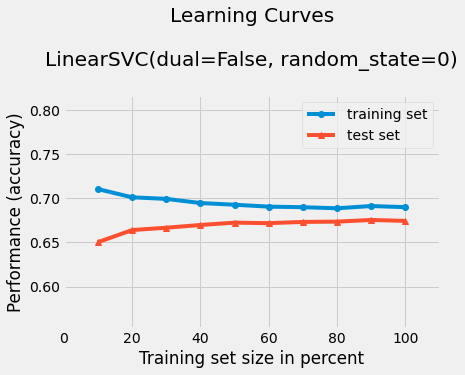

In [15]:
# Plot learning curve


LinearSVC = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

plot_learning_curves(X_train, y_train, X_test, y_test, LinearSVC_clf, scoring= 'accuracy')
plt.show()

In [16]:
# Implementing LinearSVM from sklearn library
# Similar to SVC with parameter kernel=’linear’, 
# scale better to large numbers of samples.
# supports both dense and sparse input
# multiclass support is handled according to a one-vs-the-rest scheme.
# The more features the better
from sklearn.pipeline import make_pipeline

SVC_clf = make_pipeline(StandardScaler(), LinearSVC)


# param_grid_SVC = { 
    
# }


SVC_clf.fit(X_train, y_train)

y_test_predict = SVC_clf.predict(X_test)
# np.save('y_predict_name_sparse.npy', y_test_predict)
print(accuracy_score(y_test, y_test_predict))
# print(LinearSVC_clf.score(X_test, y_test))




# 0 score for precision, recall and f1 on class label 3...
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm

0.6745143233454066
              precision    recall  f1-score   support

         1.0       0.64      0.66      0.65      4049
         2.0       0.65      0.57      0.61      4049
         3.0       0.73      0.80      0.76      4050

    accuracy                           0.67     12148
   macro avg       0.67      0.67      0.67     12148
weighted avg       0.67      0.67      0.67     12148



array([[2654,  859,  536],
       [1058, 2307,  684],
       [ 433,  384, 3233]], dtype=int64)

In [ ]:
# Cross Validation To evaluate model
# Shuffle Split is a random split method, not guranteed unique split but likely on large data.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
scores = cross_val_score(LinearSVC_clf, X_oversampled, y_oversampled, cv=cv)
scores

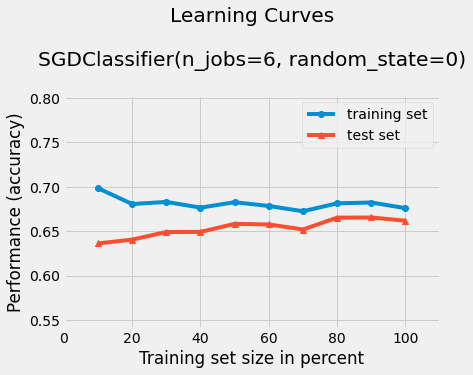

In [4]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=6, random_state=0)
plot_learning_curves(X_train, y_train, X_test, y_test, clf_SGD, scoring= 'accuracy')
plt.show()